In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from openbb_terminal.sdk import openbb
from openbb_terminal.sdk import TerminalStyle
theme = TerminalStyle("light", "light", "light")

In [306]:
ticks = ['ATCO-B.ST', 'INVE-B.ST', 'VOLV-B.ST', 'HEXA-B.ST', 'SEB-A.ST', 'SAND.ST', 'ASSA-B.ST', 'EVO.ST',
         'SWED-A.ST', 'AZN.ST', 'SHB-B.ST', 'NIBE-B.ST', 'HM-B.ST', 'ERIC-B.ST', 'NDA-SE.ST', 'ESSITY-B.ST', 'ABB',
         'ALFA.ST', 'BOL.ST', 'TELIA.ST', 'SCA-B.ST', 'SKF-B.ST', 'TEL2-B.ST', 'GETI-B.ST',
         
         #'CALTX.ST', 'SINCH.ST', 'EMBRAC-B.ST', 'SBB-B.ST',
         #'CAST.ST', 'KAMBI.ST', 'CTM.ST', 'EQT.ST', 'KIND-SDB.ST',
         #'ELUX-B.ST','SKA-B.ST','SSAB-B.ST'
          ]


In [307]:
df_ticks = {}
for tick in ticks:
    #df = get_tick(tick = tick, interval=1)
    df = openbb.stocks.load(tick, start_date='2016-01-01', end_date='2024-01-01', interval=24*60)
    df_ticks[tick] = df

Loading Daily data for ATCO-B.ST with starting period 2016-01-04.

Loading Daily data for INVE-B.ST with starting period 2016-01-04.

Loading Daily data for VOLV-B.ST with starting period 2016-01-04.

Loading Daily data for HEXA-B.ST with starting period 2016-01-04.

Loading Daily data for SEB-A.ST with starting period 2016-01-04.

Loading Daily data for SAND.ST with starting period 2016-01-04.

Loading Daily data for ASSA-B.ST with starting period 2016-01-04.

Loading Daily data for EVO.ST with starting period 2016-01-04.

Loading Daily data for SWED-A.ST with starting period 2016-01-04.

Loading Daily data for AZN.ST with starting period 2016-01-04.

Loading Daily data for SHB-B.ST with starting period 2016-01-04.

Loading Daily data for NIBE-B.ST with starting period 2016-01-04.

Loading Daily data for HM-B.ST with starting period 2016-01-04.

Loading Daily data for ERIC-B.ST with starting period 2016-01-04.

Loading Daily data for NDA-SE.ST with starting period 2016-01-04.

Loading Daily data for ESSITY-B.ST with starting period 2017-06-15.

Loading Daily data for ABB with starting period 2016-01-04.

Loading Daily data for ALFA.ST with starting period 2016-01-04.

Loading Daily data for BOL.ST with starting period 2016-01-04.

Loading Daily data for TELIA.ST with starting period 2016-01-04.

Loading Daily data for SCA-B.ST with starting period 2016-01-04.

Loading Daily data for SKF-B.ST with starting period 2016-01-04.

Loading Daily data for TEL2-B.ST with starting period 2016-01-04.

Loading Daily data for GETI-B.ST with starting period 2016-01-04.

In [308]:
pd.DataFrame(columns = ticks)

,ATCO-B.ST,INVE-B.ST,VOLV-B.ST,HEXA-B.ST,SEB-A.ST,SAND.ST,ASSA-B.ST,EVO.ST,SWED-A.ST,AZN.ST,...,NDA-SE.ST,ESSITY-B.ST,ABB,ALFA.ST,BOL.ST,TELIA.ST,SCA-B.ST,SKF-B.ST,TEL2-B.ST,GETI-B.ST


In [309]:
df_pct = pd.DataFrame(columns = ticks)

#f, ax = plt.subplots(figsize=(20, 12))
for tick in df_ticks.keys():
    df_cell = df_ticks[tick]['Close'].pct_change()
    df_pct[tick] = df_cell
    

<AxesSubplot: xlabel='date'>

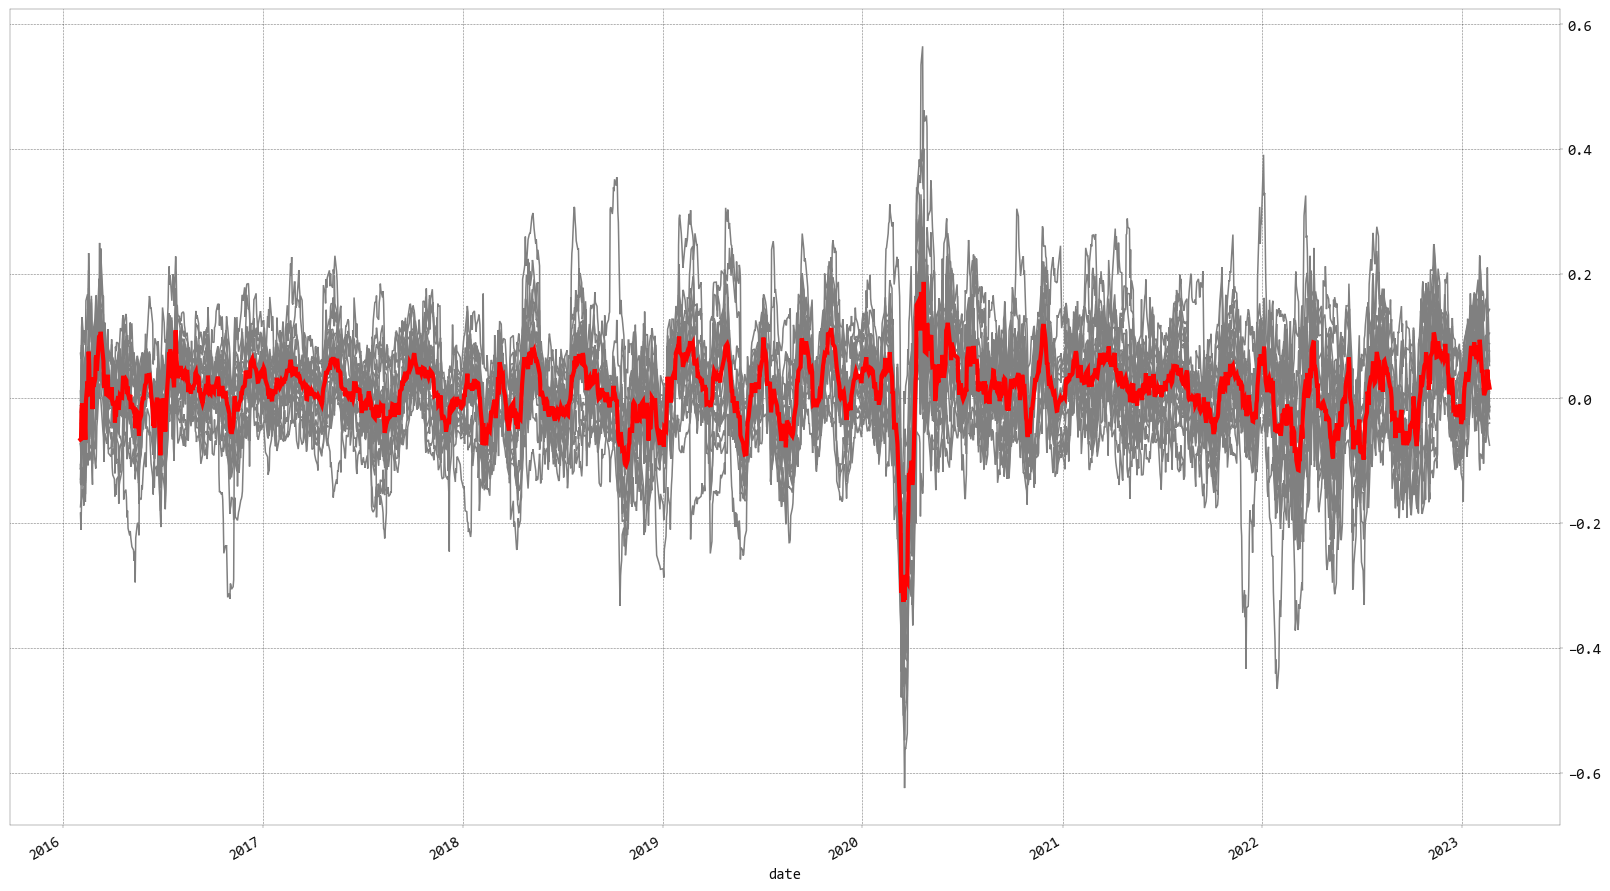

In [310]:
f, ax = plt.subplots(figsize=(20, 12))
df_pct.rolling(20).sum().plot(ax=ax, legend=False, color = 'grey')
df_pct.rolling(20).sum().mean(axis=1).plot(ax=ax, color='r', lw=3)

In [319]:
holding_days = 40
nr_stocks = 6

df_pct_add_rol_rank = df_pct.rolling(holding_days, min_periods=holding_days-4).median().iloc[::holding_days, :].rank(axis=1, ascending = False)
df_trade = (df_pct_add_rol_rank<nr_stocks+1)
df_trade = df_trade.resample('D').ffill().shift(1).fillna(False)
df_trade#.sum(axis=1).plot()

,ATCO-B.ST,INVE-B.ST,VOLV-B.ST,HEXA-B.ST,SEB-A.ST,SAND.ST,ASSA-B.ST,EVO.ST,SWED-A.ST,AZN.ST,...,NDA-SE.ST,ESSITY-B.ST,ABB,ALFA.ST,BOL.ST,TELIA.ST,SCA-B.ST,SKF-B.ST,TEL2-B.ST,GETI-B.ST
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-06,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-08,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-24,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
2022-12-25,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
2022-12-26,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True


In [320]:
df_trade.iloc[-1].sort_values()

ATCO-B.ST      False
SCA-B.ST       False
TELIA.ST       False
BOL.ST         False
ALFA.ST        False
ABB            False
ESSITY-B.ST    False
NDA-SE.ST      False
ERIC-B.ST      False
TEL2-B.ST      False
NIBE-B.ST      False
AZN.ST         False
EVO.ST         False
ASSA-B.ST      False
SEB-A.ST       False
HEXA-B.ST      False
INVE-B.ST      False
SHB-B.ST       False
HM-B.ST         True
SWED-A.ST       True
SAND.ST         True
VOLV-B.ST       True
SKF-B.ST        True
GETI-B.ST       True
Name: 2022-12-28 00:00:00, dtype: bool

In [321]:

df_boot = pd.DataFrame(columns = np.arange(1, 1000), index = df_pct.index)
for i in df_boot.columns:
    df_boot.loc[:,i] = df_pct.sample(nr_stocks, axis=1).cumsum().sum(axis=1)
    

C:\Users\ohjartarson\AppData\Local\Temp\ipykernel_4332\110343347.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_boot.loc[:,i] = df_pct.sample(nr_stocks, axis=1).cumsum().sum(axis=1)


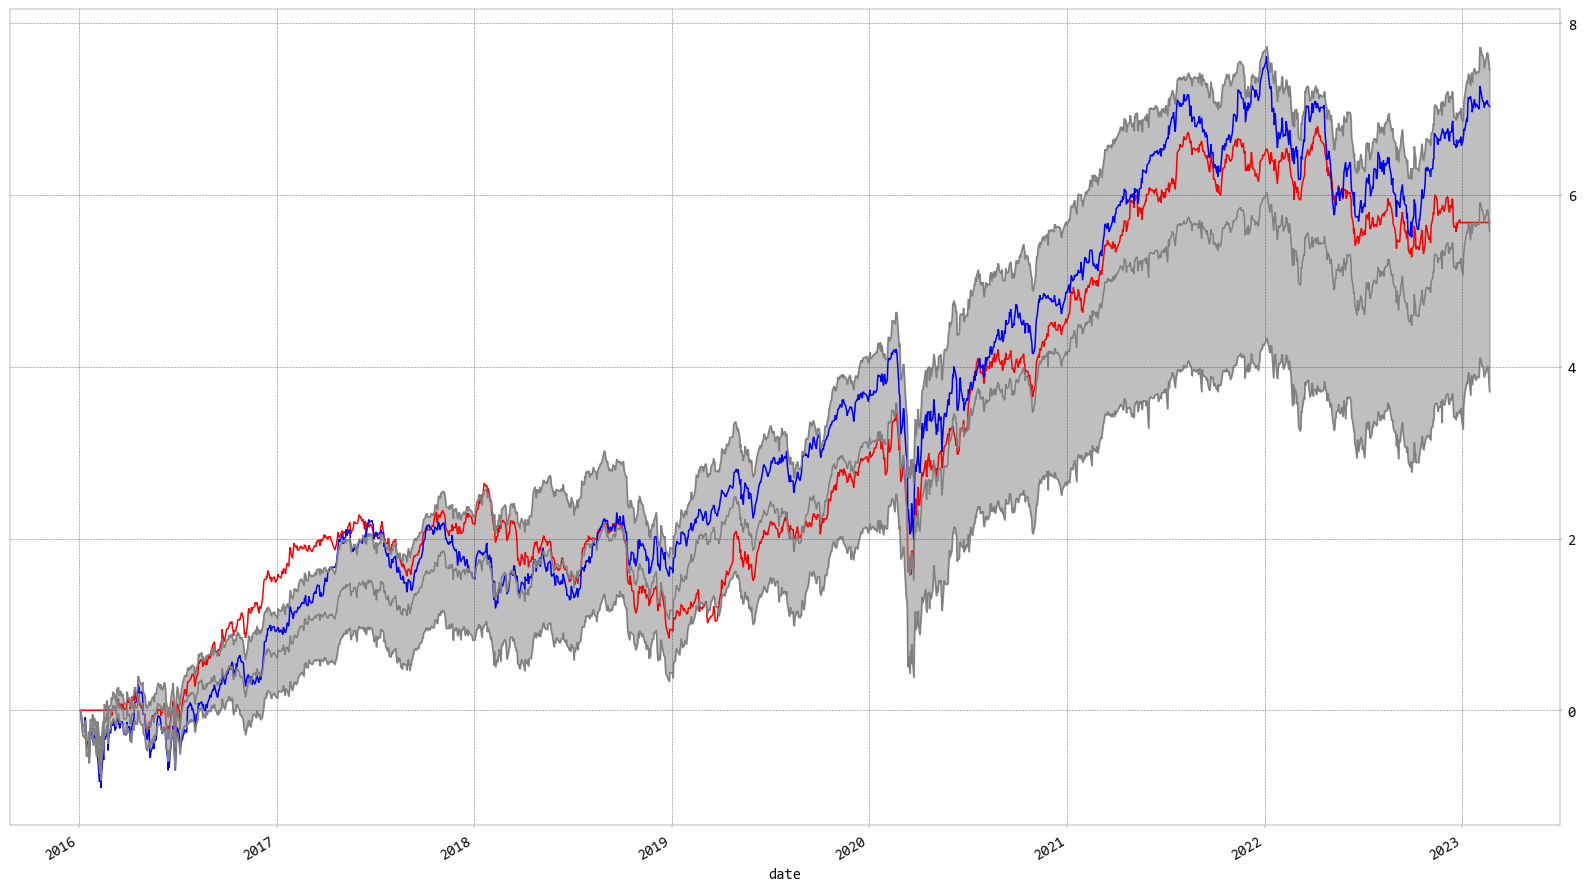

In [322]:
f, ax = plt.subplots(figsize=(20, 12))
df_pct[df_trade].cumsum().ffill().sum(axis=1).plot(ax=ax, color='red')
df_pct['INVE-B.ST'].cumsum().mul(nr_stocks).plot(ax=ax, color='blue')

df_boot.mean(axis=1).plot(ax=ax, color='grey')
upper = df_boot.mean(axis=1).add(df_boot.std(axis=1))
lower = df_boot.mean(axis=1).sub(df_boot.std(axis=1))
upper.plot(ax=ax, color='grey')
lower.plot(ax=ax, color='grey')

ax.fill_between(df_boot.index, lower, upper, alpha = 0.5, color = 'grey')

In [ ]:
for tick in df_ticks.keys():
    f, ax = plt.subplots(figsize=(20, 12))
    df_cell = df_ticks[tick]['Close']
    df_trade[tick]
    break

<AxesSubplot: xlabel='date'>

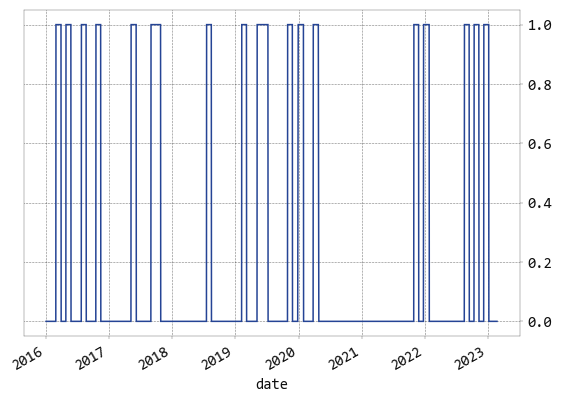

In [63]:
tick = 'ATCO-B.ST'
df_cell = pd.concat([df_pct_add[tick], df_trade[tick].rename('trade')], axis=1)
df_cell.ffill()['trade'].mul(df_cell).plot()